OCR : 테이블, 열, 항목 등

In [1]:
! pip install -qqq "trdg==1.6.0" "treescope>=0.1.1"

In [ ]:
# 글꼴
#! mkdir fonts; cd fonts; wget https://hangeul.naver.com/hangeul_static/webfont/clova/NanumDdarEGeEomMaGa.ttf
# 중국어 폰트 : https://fontmeme.com/ktype/chinese-fonts/

In [ ]:
#! pip install numpy==1.24.3
#! pip install -U trdg matplotlib

In [1]:
import treescope
treescope.basic_interactive_setup()
from trdg.generators import GeneratorFromStrings
import matplotlib.pyplot as plt

Missing modules for handwritten text generation.


In [2]:
%cd "/data/ephemeral/home/Sojeong/level2-cv-datacentric-cv-07/Data/Sojeong"

/data/ephemeral/home/Sojeong/level2-cv-datacentric-cv-07/Data/Sojeong


/data/ephemeral/home/myenv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [67]:
import random

def get_words(count=5):
    with open("chinese_words.txt", "r") as f:
        paragrphs = f.readlines()

    # 문단, 문장
    paragrphs = " ".join([x.strip() for x in paragrphs])
    sentences = [x.strip() for x in paragrphs.split(" ")]
    sentences = [x for x in sentences if x]

    # 글자 크기를 랜덤으로 지정하고 싶은 경우 크기 범위를 설정합니다
    sizes = [32, 48, 64, 80]  # 사용할 크기 리스트

    # 각 문장에 대해 개별적으로 이미지 생성
    for sentence in sentences:
        # 각 문장마다 임의의 글자 크기를 선택합니다
        size = random.choice(sizes)
    
        # GeneratorFromStrings를 통해 이미지 생성기를 설정
        generator = GeneratorFromStrings(
            sentences,
            language="cn",
            size=64,
            count=count, # 생성할 이미지 개수를 10으로 설정
            fonts=["/data/ephemeral/home/Sojeong/level2-cv-datacentric-cv-07/Data/Sojeong/font/cn/ChillHuoFangKai_F_Regular.otf"],  # <- 언어에 따라 폰트를 확보해 지정해주어야 합니다.
            margins=(10, 10, 10, 10), # # 이미지의 상하좌우 여백
            character_spacing=6,
            fit=True,
            blur=2,
            random_blur=True,
            background_type=2
        )
    
   
    # 이미지와 텍스트를 딕셔너리 형태로 저장
    words = []
    for _ , (patch, text) in enumerate(generator):
        words.append({"patch": patch, "text": text, "size": patch.size, "margin": 10})
    return words
# 이미지와 텍스트를 24개 생성
words = get_words(24)

# # 이미지 생성 함수 호출
# for image in generator.generate():
#     image.show()  # 생성된 이미지를 화면에 표시하거나 저장 가능

In [68]:
# 본 블록을 실행하면 Jupyter Notebook에서 Treescope가 변수 출력을 담당하게 됩니다.
import treescope
treescope.basic_interactive_setup()

In [69]:
# make_document 함수는 입력받은 단어 이미지를 이어붙여 문서처럼 보이는 이미지를 만들고, 이를 words 객체와 같이 출력합니다.
# 이를 지금부터 Document 타입의 객체라 불러보겠습니다.

from synth_utils import make_document, Document
document = make_document(words)
document

{'image': <PIL.Image.Image image mode=RGB size=1080x1920 at 0x7F231FA32CE0>,
 'words': [{'patch': <PIL.Image.Image image mode=RGB size=34x64 at 0x7F231EE2EA70>,
   'text': '1',
   'size': (34, 64),
   'margin': 10,
   'bbox': [10, 10, 24, 10, 24, 54, 10, 54]},
  {'patch': <PIL.Image.Image image mode=RGB size=550x64 at 0x7F231EE2EBC0>,
   'text': '谢谢惠顾，欢迎再次光临',
   'size': (550, 64),
   'margin': 10,
   'bbox': [44, 10, 574, 10, 574, 54, 44, 54]},
  {'patch': <PIL.Image.Image image mode=RGB size=451x64 at 0x7F231EE2F8B0>,
   'text': '965845134651',
   'size': (451, 64),
   'margin': 10,
   'bbox': [594, 10, 1025, 10, 1025, 54, 594, 54]},
  {'patch': <PIL.Image.Image image mode=RGB size=34x64 at 0x7F231EE2C1C0>,
   'text': '1',
   'size': (34, 64),
   'margin': 10,
   'bbox': [1045, 10, 1059, 10, 1059, 54, 1045, 54]},
  {'patch': <PIL.Image.Image image mode=RGB size=59x64 at 0x7F231EE2FC10>,
   'text': '序',
   'size': (59, 64),
   'margin': 10,
   'bbox': [10, 74, 49, 74, 49, 118, 10, 118]},
  {'patch': <PIL.Image.Image image mode=RGB size=65x64 at 0x7F231EE2E380>,
   'text': '份',
   'size': (65, 64),
   'margin': 10,
   'bbox': [69, 74, 114, 74, 114, 118, 69, 118]},
  {'patch': <PIL.Image.Image image mode=RGB size=2946x64 at 0x7F231EE2E440>,
   'text': '---------------',
   'size': (2946, 64),
   'margin': 10,
   'bbox': [10, 138, 2936, 138, 2936, 182, 10, 182]},
  {'patch': <PIL.Image.Image image mode=RGB size=144x64 at 0x7F231EE2DBA0>,
   'text': '优惠：',
   'size': (144, 64),
   'margin': 10,
   'bbox': [10, 202, 134, 202, 134, 246, 10, 246]},
  {'patch': <PIL.Image.Image image mode=RGB size=210x64 at 0x7F231EE2EFE0>,
   'text': '脆皮牛腩',
   'size': (210, 64),
   'margin': 10,
   'bbox': [154, 202, 344, 202, 344, 246, 154, 246]},
  {'patch': <PIL.Image.Image image mode=RGB size=211x64 at 0x7F231EE2EB60>,
   'text': '应付金额',
   'size': (211, 64),
   'margin': 10,
   'bbox': [364, 202, 555, 202, 555, 246, 364, 246]},
  {'patch': <PIL.Image.Image image mode=RGB size=212x64 at 0x7F231EE2C5E0>,
   'text': '其他折让',
   'size': (212, 64),
   'margin': 10,
   'bbox': [575, 202, 767, 202, 767, 246, 575, 246]},
  {'patch': <PIL.Image.Image image mode=RGB size=682x64 at 0x7F231EE2DDE0>,
   'text': '喜之郎CICI果汁果冻爽香橙味1',
   'size': (682, 64),
   'margin': 10,
   'bbox': [10, 266, 672, 266, 672, 310, 10, 310]},
  {'patch': <PIL.Image.Image image mode=RGB size=145x64 at 0x7F231EE2D0C0>,
   'text': '1.00',
   'size': (145, 64),
   'margin': 10,
   'bbox': [692, 266, 817, 266, 817, 310, 692, 310]},
  {'patch': <PIL.Image.Image image mode=RGB size=145x64 at 0x7F231EE2D4B0>,
   'text': '10.7',
   'size': (145, 64),
   'margin': 10,
   'bbox': [837, 266, 962, 266, 962, 310, 837, 310]},
  {'patch': <PIL.Image.Image image mode=RGB size=239x64 at 0x7F231EE2F250>,
   'text': '本次积分：',
   'size': (239, 64),
   'margin': 10,
   'bbox': [10, 330, 229, 330, 229, 374, 10, 374]},
  {'patch': <PIL.Image.Image image mode=RGB size=162x64 at 0x7F231EE2FBE0>,
   'text': '生蚝档',
   'size': (162, 64),
   'margin': 10,
   'bbox': [249, 330, 391, 330, 391, 374, 249, 374]},
  {'patch': <PIL.Image.Image image mode=RGB size=194x64 at 0x7F231EE2F4F0>,
   'text': '会员号：',
   'size': (194, 64),
   'margin': 10,
   'bbox': [411, 330, 585, 330, 585, 374, 411, 374]},
  {'patch': <PIL.Image.Image image mode=RGB size=798x64 at 0x7F231EE2D090>,
   'text': 'http://checkcoverage.apple.com',
   'size': (798, 64),
   'margin': 10,
   'bbox': [10, 394, 788, 394, 788, 438, 10, 438]},
  {'patch': <PIL.Image.Image image mode=RGB size=110x64 at 0x7F2316E94850>,
   'text': '小计',
   'size': (110, 64),
   'margin': 10,
   'bbox': [808, 394, 898, 394, 898, 438, 808, 438]},
  {'patch': <PIL.Image.Image image mode=RGB size=48x64 at 0x7F2316E96AA0>,
   'text': '5',
   'size': (48, 64),
   'margin': 10,
   'bbox': [918, 394, 946, 394, 946, 438, 918, 438]},
  {'patch': <PIL.Image.Image image mode=RGB size=95x64 at 0x7F2316E94790>,
   'text': '1瓶',
   'size': (95, 64),
   'margin': 10,
   'bbox': [966, 394

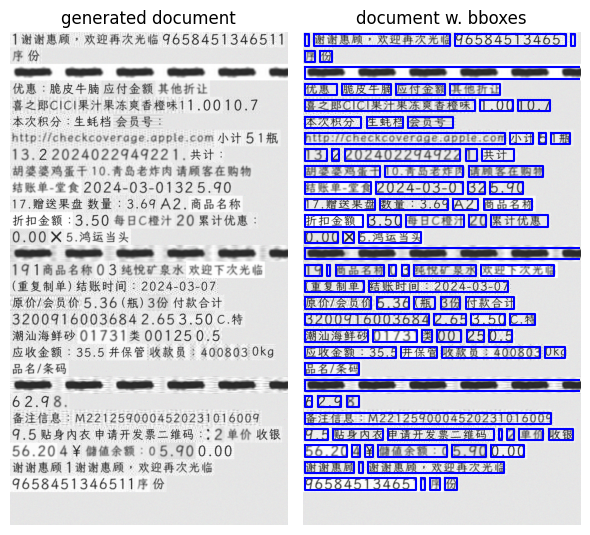

In [72]:
from synth_utils import draw_bbox
# 이번에는 좀 더 긴 문서를 만들어보겠습니다.
document = make_document(get_words(100))

plt.figure(figsize=(6,6))

# 화면 왼쪽에 생성된 문서 이미지를 출력합니다.
plt.subplot(1, 2, 1)
plt.imshow(document['image'])
plt.axis('off')
plt.title("generated document")

# 화면 오른쪽에는 문서 이미지에 bounding box를 그린 이미지를 출력합니다.
plt.subplot(1, 2, 2)
draw_bbox(document)
plt.title("document w. bboxes")

plt.tight_layout()

augmentation